# Smučarski skoki

In [103]:
#Najprej naložimo pandas in potrebne knjižnice.
import pandas as pd
import matplotlib

import numpy as np
import math

from matplotlib import pyplot as plt
%matplotlib inline

In [117]:
#Nato uvozimo naše podatke in jih za občutek nekaj prikažemo
skoki = pd.read_csv('../data/skoki.csv', sep=',', encoding='latin1')
skoki.head(10)

,uvrstitev,startna_st,name,state,velocity_1,distance_1,SLO_1,GER_1,AUT_1,POL_1,...,ROU_2,USA_2,KOR_2,SWE_2,gate_2,tocke_2,mesto_2,tocke,hill_size,k_point
0,1.0,9.0,DAMJAN Jernej,SLO,88.1,140.0,18.5,18.5,NaN,NaN,...,NaN,NaN,NaN,19.5,9.0,153.2,2.0,301.4,142,120
1,2.0,34.0,FORFANG Johann Andre,NOR,88.5,136.5,18.0,18.0,NaN,NaN,...,NaN,NaN,NaN,19.0,9.0,153.1,3.0,298.6,142,120
2,3.0,43.0,WELLINGER Andreas,GER,88.4,140.0,19.0,19.0,NaN,NaN,...,NaN,NaN,NaN,19.5,9.0,147.0,5.0,293.0,142,120
3,4.0,46.0,TANDE Daniel Andre,NOR,88.5,138.5,18.5,19.0,NaN,NaN,...,NaN,NaN,NaN,19.0,9.0,146.4,6.0,292.7,142,120
4,5.0,37.0,EISENBICHLER Markus,GER,88.0,133.5,17.5,17.5,NaN,NaN,...,NaN,NaN,NaN,19.0,9.0,151.0,4.0,284.3,142,120
5,6.0,47.0,FREITAG Richard,GER,88.0,134.5,18.5,18.5,NaN,NaN,...,NaN,NaN,NaN,18.5,9.0,146.2,7.0,284.0,142,120
6,7.0,39.0,JOHANSSON Robert,NOR,88.8,138.5,18.5,19.0,NaN,NaN,...,NaN,NaN,NaN,18.0,9.0,136.1,16.0,283.1,142,120
7,8.0,41.0,KUBACKI Dawid,POL,88.6,138.0,19.0,19.0,NaN,NaN,...,NaN,NaN,NaN,18.5,9.0,135.9,17.0,282.0,142,120
8,9.0,42.0,LEYHE Stephan,GER,88.5,136.5,18.5,18.5,NaN,NaN,...,NaN,NaN,NaN,18.0,9.0,140.7,9.0,281.1,142,120
9,10.0,50.0,KOBAYASHI Junshiro,JPN,87.7,137.0,18.5,19.0,NaN,NaN,...,NaN,NaN,NaN,19.0,9.0,138.4,12.0,280.7,142,120


# Analiza podatkov

Najprej si poglejmo nekaj lastnosti skakalnic, na katerih skačejo skakalci. Za vsako skakalnico prikažemo število skokov, ki so jih na njej izvedli skakalci.

In [105]:
skoki.groupby('hill_size').size().sort_values(ascending=False)

hill_size
140    930
134    926
225    480
137    477
142    361
130    329
145    240
100    180
138    179
106     90
127     89
240     89
139     60
205     60
215     60
200     59
213     30
109     30
235     28
dtype: int64

Da si bolje predstavljamo podatke, jih ponazorimo s stolpčnim diagramom. Opazimo, da je na skakalnicah določenih velikosti zelo malo skokov. Vzrok za to je lahko, slabo vreme , ki je prisililo organizatorje, da so prestavili tekmovanje na skakalnico, ki ni načrtovana za svetovni pokal.

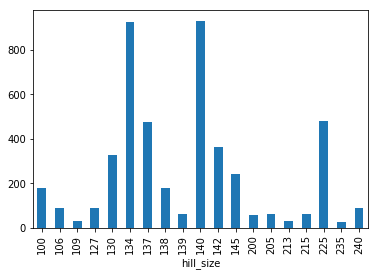

In [106]:
skoki.groupby('hill_size').size().plot.bar()

# Uvrstitve
Sedaj si lahko pogledamo podatke o udeležencih, torej o tekmovalcih in državah ki tekmujejo v svetovnem pokalu.
Zanima nas lahko, kateri tekmovalci in katere države so bile v zadnjem času nauspešnejše.
Na začetku si poglejmo kdo ima največ uvrstitev v finalno serijo

In [55]:
skoki.groupby('name').size().sort_values(ascending=False).head(10)

name
PREVC Peter         146
STOCH Kamil         127
KRAFT Stefan        126
FREITAG Richard     123
HAYBOECK Michael    123
ZYLA Piotr          111
KASAI Noriaki       107
FANNEMEL Anders     107
AMMANN Simon        107
FREUND Severin      105
dtype: int64

Kot kaže, smo lahko slovenci zadovoljni, saj je na prvem mestu slovenski smučarski as Peter Prevc.
Ali smo tako uspešni tudi kot država?

In [57]:
skoki.groupby('state').size().sort_values(ascending=False).head(10)

state
GER    770
NOR    714
AUT    692
SLO    605
POL    592
JPN    423
CZE    273
SUI    167
RUS    137
FIN    106
dtype: int64

Na tej lestvici slovenija zaseda četrto mesto, kar je odlično.
Glede na našo majhnost je težko pričakovati, da bi imeli toliko vrhunskih skakalcev kot jih ima Nemčija, ki je na prvem mestu.

Zgoraj smo opazovali le kdo se je največkrat uvrstil v finalno serijo, kar pa nas mnogokrat niti ne zanima. Na koncu vsi želimo izvedeti kdo je zmagal. zato si poglejmo še to lestvico.

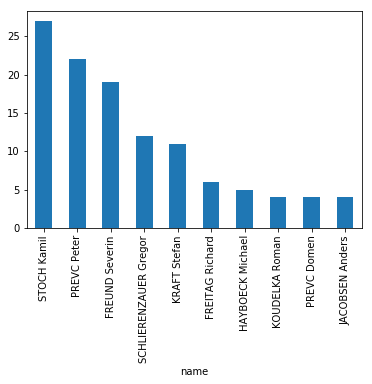

In [124]:
tekmovalec_prvi = skoki[skoki['uvrstitev'] == 1].groupby('name').size().sort_values(ascending=False).head(10).plot.bar()
tekmovalec_prvi

Kako zanimiva lestvica! Nanjo se uvrstita dva slovenca. To sta brata prevc, ki imata zaradi svojimi izjemnimi skakalnimi in letalskimi sposobnostmi v lasti mnoge zanimive rekorde. Peter je zbral največ zmag in največ točk v eni sezoni, skupaj sta kot edina brata do sedaj poskrbela za dvojno zmago v svetovnem pokalu v skokih. Domen in Norijaki Kasai pa sta bila par z največjo razliko v letih, ki je stal na stopničkah. To sta bila tudi najstarejši in najmlajši udeleženec tekme.

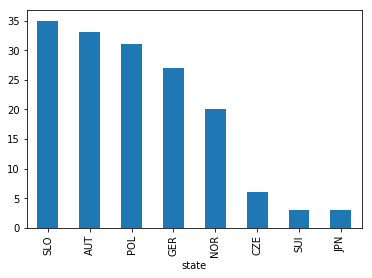

In [119]:
drzava_prva = skoki[skoki['uvrstitev'] == 1].groupby('state').size().sort_values(ascending=False).plot.bar()
drzava_prva

Po zmagah pa Slovenija blesti. Veliko zaslug za take rezultate ima trener Goran Janus, ki je občutno uplival na izboljšanje slovenskih nastopov.

Uvrstitve na zmagovalni oder pa so razporejene kot prikazujejo naslednji diagrami.

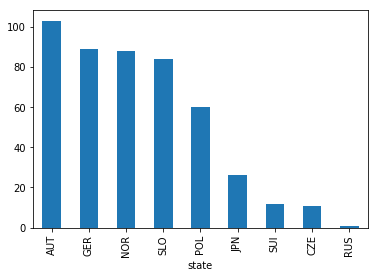

In [128]:
drzava_stopnicke = skoki[skoki['uvrstitev'] <= 3].groupby('state').size().sort_values(ascending=False)
drzava_stopnicke.plot.bar()

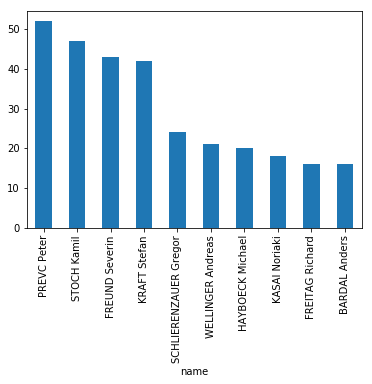

In [129]:
tekmovalec_stopnicke = skoki[skoki['uvrstitev'] <= 3].groupby('name').size().sort_values(ascending=False).head(10)
tekmovalec_stopnicke.plot.bar()

Ko govorimo o športum, se ne moremo izogniti pogovoru o sreči. Nekdo je imel srečo, drugi pa ne. Kriterijev za izbiro "srečneža" je več.
Moj kriterij je, da je srečnež tisti, ki je največkrat uspeu zmagati v primerjavi z osvojenimi drugimi mesti.

In [122]:
tekmovalec_prvi = skoki[skoki['uvrstitev'] == 1].groupby('name').size().sort_values(ascending=False)
tekmovalec_drugi = skoki[skoki['uvrstitev'] == 2].groupby('name').size().sort_values(ascending=False)
primerjava_t = tekmovalec_prvi.to_frame().join(tekmovalec_drugi.to_frame(), lsuffix='_prvi', rsuffix='_drugi')

In [123]:
primerjava_t['srecnez'] = primerjava_t['0_prvi']/primerjava_t['0_drugi']
primerjava_t.sort_values('srecnez', ascending=False).head(10)

,0_prvi,0_drugi,srecnez
name,,,
JACOBSEN Anders,4,1.0,4.000000
KOUDELKA Roman,4,1.0,4.000000
STOCH Kamil,27,13.0,2.076923
SCHLIERENZAUER Gregor,12,6.0,2.000000
TEPES Jurij,2,1.0,2.000000
DAMJAN Jernej,2,1.0,2.000000
KOT Maciej,2,1.0,2.000000
FREUND Severin,19,12.0,1.583333
PREVC Peter,22,15.0,1.466667


Slovenija ima kar štiri "srečneže" med 10. Iz tega bi lahko sklepali, da imamo veliko sreče v skokih. Zanimivo je, da pri spremljanju rezultatov preko družabnih omrežji človek dobi ravno nasproten občutek.

In [77]:
primerjava_d = drzava_prva.to_frame().join(drzava_druga.to_frame(), lsuffix='_prvi', rsuffix='_drugi')

In [83]:
primerjava_d['srecnez'] = primerjava_d['0_prvi']/primerjava_d['0_drugi']
primerjava_d.sort_values('srecnez', ascending=False)

,0_prvi,0_drugi,srecnez
state,,,
CZE,6,1,6.000000
POL,31,15,2.066667
SLO,35,23,1.521739
AUT,33,32,1.031250
GER,27,35,0.771429
SUI,3,4,0.750000
NOR,20,37,0.540541
JPN,3,7,0.428571


Vidimo da niso srečniki le slovenski posamezniki, ampak tudi kot celotna reprezentanca spadamo med tri z "največ krompirja".

Če je to lestvica "srečnežev", pa si lahko pogledamo še lestvico "nesrečnežev". Očiten kriterij tukaj bi bil "nehvaležno" četrto mesto.

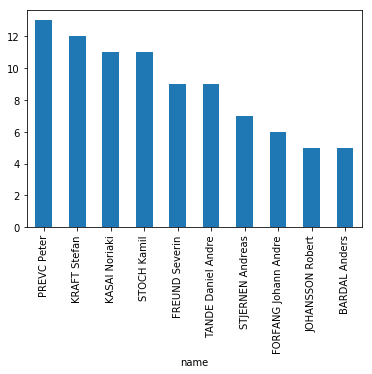

In [121]:
tekmovalec_nesrecnez = skoki[skoki['uvrstitev'] == 4].groupby('name').size().sort_values(ascending=False)
tekmovalec_nesrecnez.head(10).plot.bar()

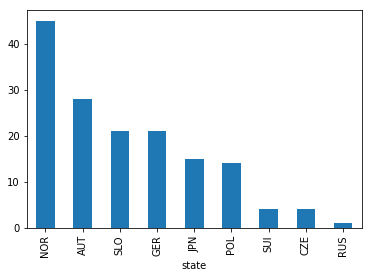

In [131]:
drzava_nesrecnez = skoki[skoki['uvrstitev'] == 4].groupby('state').size().sort_values(ascending=False)
drzava_nesrecnez.plot.bar()

Vidimo, da je v tej razpredelnici največji "nesrečnež" Peter Prevc, Slovenija, pa zaseda tretje mesto.
Ko pa že govorimo o "nesrečnežih", je potrebno povdariti, da v resnici gledamo kolikokrat je bil kdo četrti, kar je izjemen dosežek.
zato so zgornji nesrečniki prav najboljši skakalci zadnjih let.

# Zanimivost
Poglejmo si eno zanimivost svetovnih pokalov, ki pa je nekaterim manj poznana. Katera je najslabša uvrstitev v prvi seriji, ki je vodila v finalno serijo. Ker je v finalni seriji 30 najboljših, bi bil logičen odgovor 30. Pa si poglejmo, če je to res.

In [132]:
maksimum = skoki['mesto_1'].max()
maksimum

41.0

Zgornji rezultat je presenetljiv za tiste, ki ne poznajo naslednjega pravila.
Tekmovalec se v primeru padca uvrsti v finalno serijo, če je njegov skok znašal vsaj 95% najdaljšega skoka.

# Določitev mest
Pričakujemo lahko, da daljši skoki prinašajo boljšo uvrstitev. Poglejmo si kako je s tem.

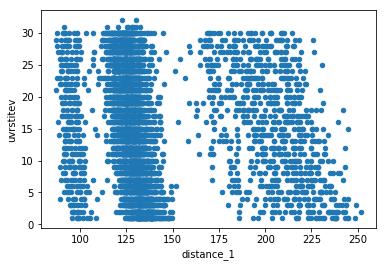

In [134]:
skoki.plot.scatter('distance_1', 'uvrstitev')

Zgornji podatki so zelo nepregledni in ne povejo veliko. Problem je, da smo različno velike skakalnice primerjali skupaj.
poglejmo si kako izgledajo podatki za vsako skakalnico posebej.

hill_size
100    Axes(0.125,0.125;0.775x0.755)
106    Axes(0.125,0.125;0.775x0.755)
109    Axes(0.125,0.125;0.775x0.755)
127    Axes(0.125,0.125;0.775x0.755)
130    Axes(0.125,0.125;0.775x0.755)
134    Axes(0.125,0.125;0.775x0.755)
137    Axes(0.125,0.125;0.775x0.755)
138    Axes(0.125,0.125;0.775x0.755)
139    Axes(0.125,0.125;0.775x0.755)
140    Axes(0.125,0.125;0.775x0.755)
142    Axes(0.125,0.125;0.775x0.755)
145    Axes(0.125,0.125;0.775x0.755)
200    Axes(0.125,0.125;0.775x0.755)
205    Axes(0.125,0.125;0.775x0.755)
213    Axes(0.125,0.125;0.775x0.755)
215    Axes(0.125,0.125;0.775x0.755)
225    Axes(0.125,0.125;0.775x0.755)
235    Axes(0.125,0.125;0.775x0.755)
240    Axes(0.125,0.125;0.775x0.755)
dtype: object

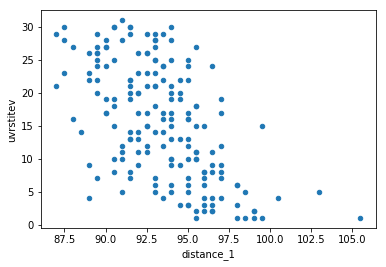

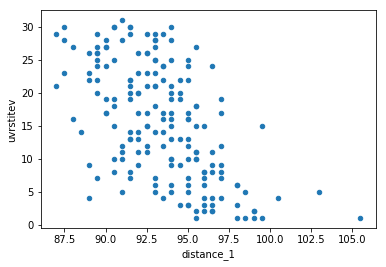

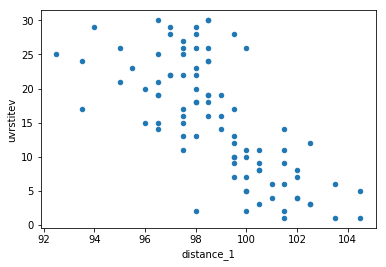

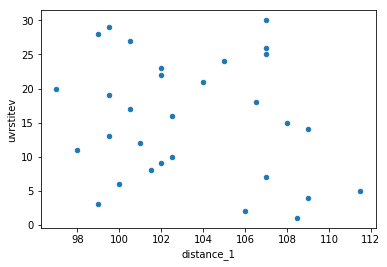

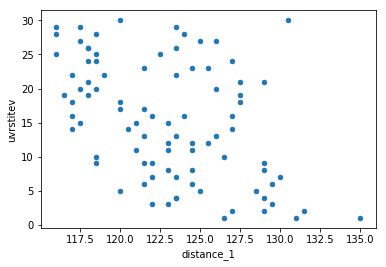

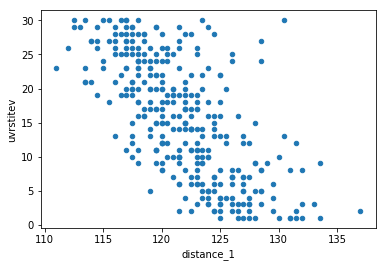

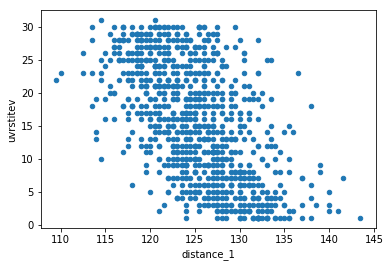

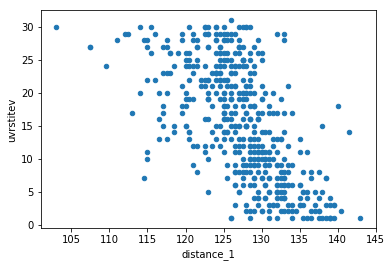

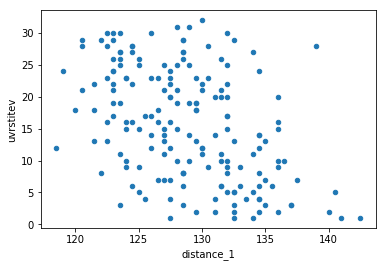

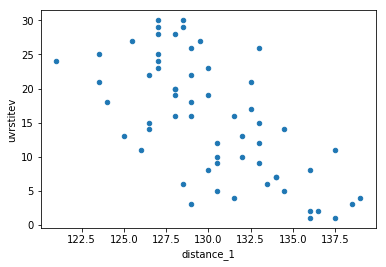

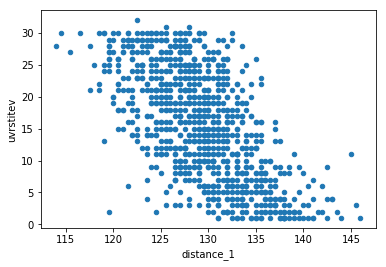

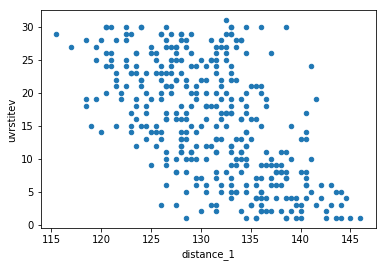

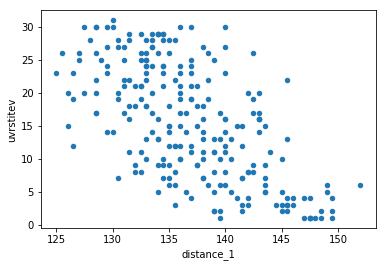

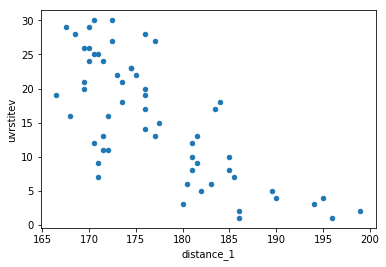

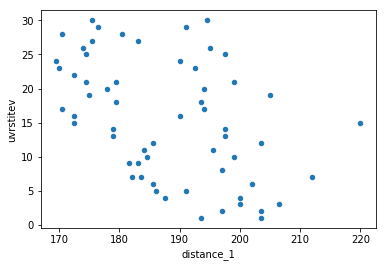

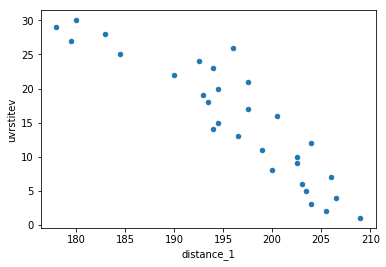

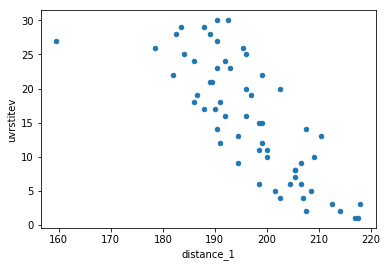

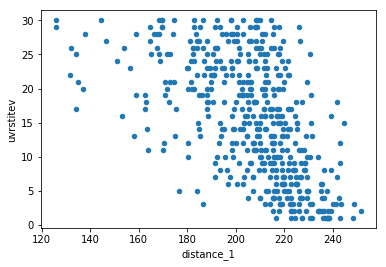

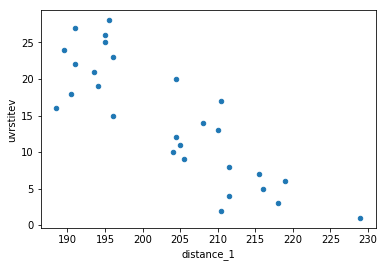

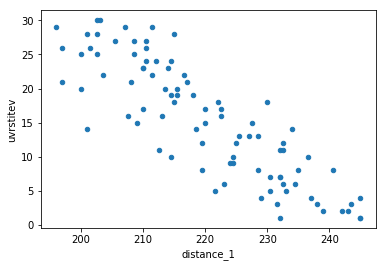

In [135]:
skoki.groupby('hill_size').plot.scatter('distance_1', 'uvrstitev')

Pri nekaterih skakalnicah se lepo vidi povezava med dolžino v prvi seriji in uvrstitvi. Poglejmo si še povezavo med dolžino v drugi seriji in uvrstitvijo.

hill_size
100    Axes(0.125,0.125;0.775x0.755)
106    Axes(0.125,0.125;0.775x0.755)
109    Axes(0.125,0.125;0.775x0.755)
127    Axes(0.125,0.125;0.775x0.755)
130    Axes(0.125,0.125;0.775x0.755)
134    Axes(0.125,0.125;0.775x0.755)
137    Axes(0.125,0.125;0.775x0.755)
138    Axes(0.125,0.125;0.775x0.755)
139    Axes(0.125,0.125;0.775x0.755)
140    Axes(0.125,0.125;0.775x0.755)
142    Axes(0.125,0.125;0.775x0.755)
145    Axes(0.125,0.125;0.775x0.755)
200    Axes(0.125,0.125;0.775x0.755)
205    Axes(0.125,0.125;0.775x0.755)
213    Axes(0.125,0.125;0.775x0.755)
215    Axes(0.125,0.125;0.775x0.755)
225    Axes(0.125,0.125;0.775x0.755)
235    Axes(0.125,0.125;0.775x0.755)
240    Axes(0.125,0.125;0.775x0.755)
dtype: object

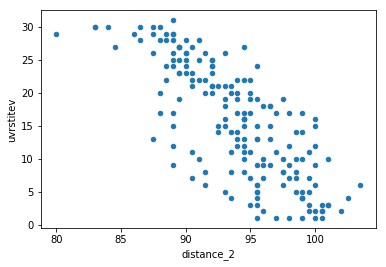

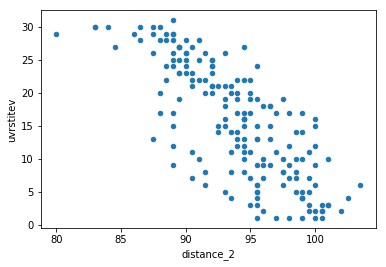

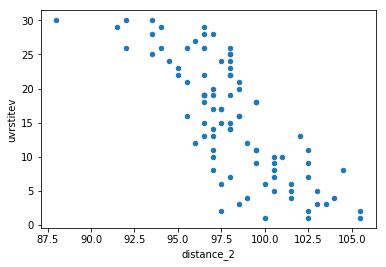

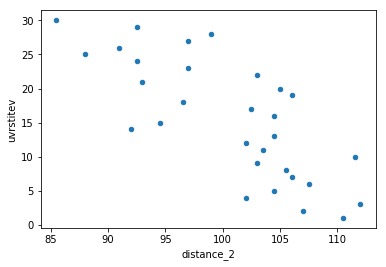

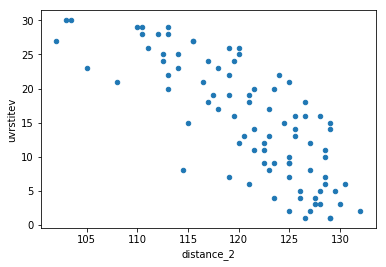

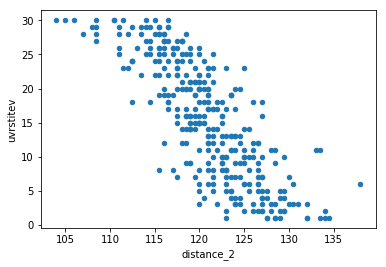

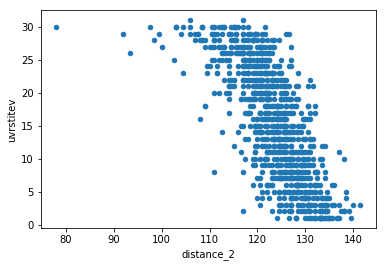

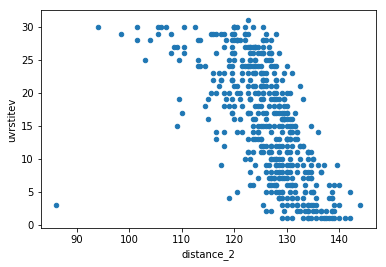

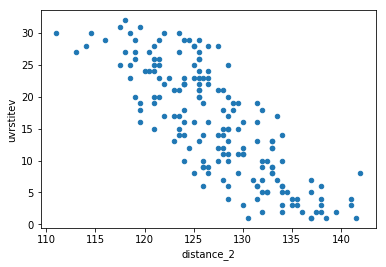

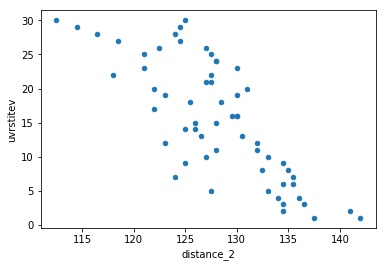

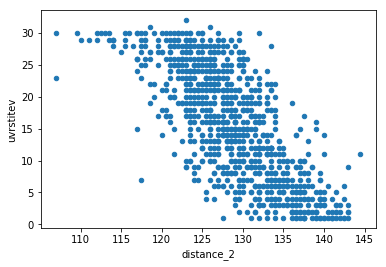

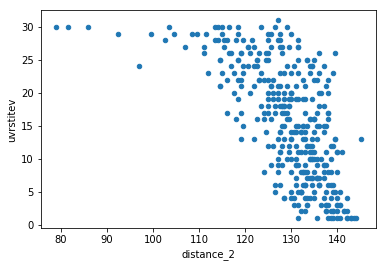

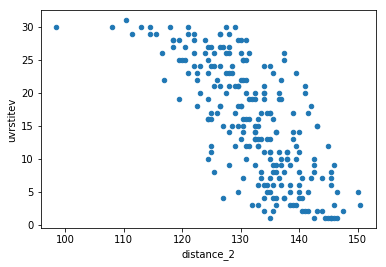

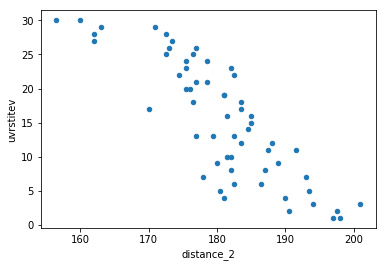

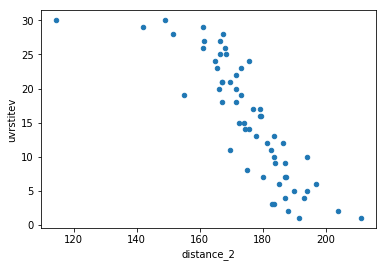

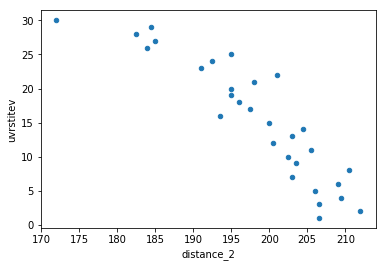

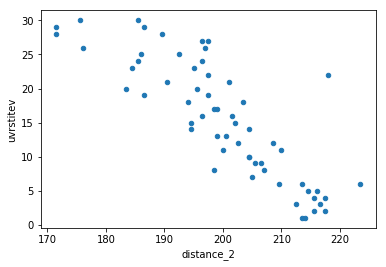

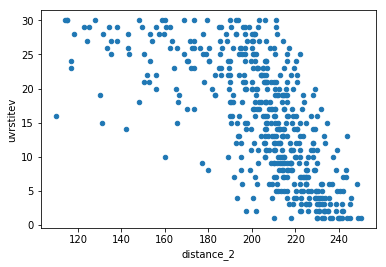

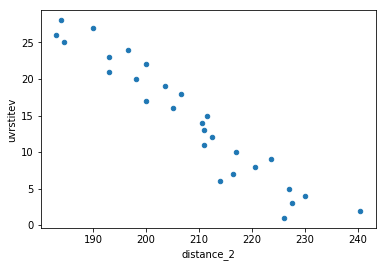

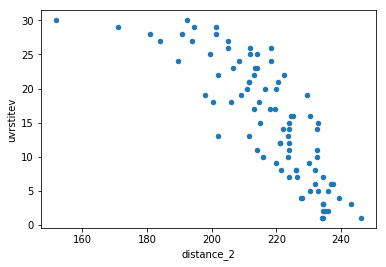

In [136]:
skoki.groupby('hill_size').plot.scatter('distance_2', 'uvrstitev')

Opazimo lahko, da so podatkom za večje skakalnice ustrezjo položnejše regresijske premice, kot pri manjših skakalnicah. To je pričakovano, saj so razlike med najboljšimi in najslabšimi pri dolgih skokih opaznejše.

# Sodniki
Pri športu smo že rekli, da ne moremo mimo sreče, a še ena stvar brez katere pri športu ne gre so sodniki. Vedno znova in znova pa se odvijajo tudi debate o tem kako pravični so sodniki. Pri večini športov je to zelo težko preveriti, pri skokih pa lahko primerjamo različne sodnike in vidimo ča kateri od teh sodnikov ocenjuje svojo državo bolje kot kateri drug sodnik.
Ko poslušamo komentatorja Andreja Stareta velikokrat slišimo kritike na račun poljskih sodnikov, zato bomo preverili ali nas poljski sodniki res drugače ocenjujejo kot naši.
Naša ničelna hipoteza bo, da so ocene slovenskih sodnikov enake ocenam poljskih sodnikov. To hipotezo pa bomo testirali s testom znakov.

In [222]:
sod_1 = skoki[skoki['state'] == 'SLO'][sodniki_1]
sod_2 = skoki[skoki['state'] == 'SLO'][sodniki_2]
sod_2 = sod_2.rename(columns=lambda x: x.replace('2', '1'))
df_new = pd.concat([sod_1, sod_2])
df_new
primerjava_sod = df_new.loc[:, ['SLO_1', 'POL_1']]
primerjava_sod['razlika'] = primerjava_sod['SLO_1'] - primerjava_sod['POL_1']
plus = primerjava_sod[primerjava_sod['razlika'] > 0]['razlika'].size
minus = primerjava_sod[primerjava_sod['razlika'] < 0]['razlika'].size
n= plus + minus
K = (n -1)/2 - 0.98* (n)**0.5
K - min(plus, minus)


6.549222254226905

Ker je rezultat na koncu pozitiven lahko ničelno hipotezo zavržemo. Torej nas poljski sodniki ocenjujejo drugače kot naši.
Test lahko naredimo tudi v drugo smer in ugotovimo naslednje:

In [226]:
sod_1 = skoki[skoki['state'] == 'POL'][sodniki_1]
sod_2 = skoki[skoki['state'] == 'POL'][sodniki_2]
sod_2 = sod_2.rename(columns=lambda x: x.replace('2', '1'))
df_new = pd.concat([sod_1, sod_2])
df_new
primerjava_sod = df_new.loc[:, ['SLO_1', 'POL_1']]
primerjava_sod['razlika'] = primerjava_sod['SLO_1'] - primerjava_sod['POL_1']
plus = primerjava_sod[primerjava_sod['razlika'] > 0]['razlika'].size
minus = primerjava_sod[primerjava_sod['razlika'] < 0]['razlika'].size
n= plus + minus
K = (n -1)/2 - 0.98* (n)**0.5
K - min(plus, minus)

15.602485160405166

Tudi mi ocenjujemo Poljake drugače, kot se ocenjujejo sami.

In [161]:
skoki[(skoki['distance_1'] > 180) & (skoki['hill_size'] < 200)]

,uvrstitev,startna_st,name,state,velocity_1,distance_1,SLO_1,GER_1,AUT_1,POL_1,...,ROU_2,USA_2,KOR_2,SWE_2,gate_2,tocke_2,mesto_2,tocke,hill_size,k_point
1708,1.0,35.0,FREUND Severin,GER,102.6,227.5,NaN,18.0,19.0,NaN,...,NaN,NaN,NaN,NaN,51.0,202.8,2.0,420.5,100,90
1709,2.0,39.0,KRAFT Stefan,AUT,102.2,224.0,NaN,19.0,19.0,NaN,...,NaN,NaN,NaN,NaN,51.0,179.0,11.0,394.4,100,90
1710,3.0,11.0,TEPES Jurij,SLO,102.7,186.5,NaN,17.0,18.0,NaN,...,NaN,NaN,NaN,NaN,51.0,214.0,1.0,390.2,100,90
1711,4.0,38.0,PREVC Peter,SLO,102.1,205.0,NaN,18.0,18.5,NaN,...,NaN,NaN,NaN,NaN,51.0,180.0,9.0,372.4,100,90
1713,6.0,30.0,VELTA Rune,NOR,102.3,197.0,NaN,17.5,18.0,NaN,...,NaN,NaN,NaN,NaN,51.0,180.5,8.0,357.9,100,90
1714,7.0,31.0,DAMJAN Jernej,SLO,101.9,191.5,NaN,17.5,18.0,NaN,...,NaN,NaN,NaN,NaN,51.0,183.2,6.0,354.9,100,90
1715,8.0,24.0,ZYLA Piotr,POL,102.2,193.5,NaN,17.0,17.0,NaN,...,NaN,NaN,NaN,NaN,51.0,178.8,12.0,351.9,100,90
1716,9.0,29.0,EISENBICHLER Markus,GER,101.9,206.0,NaN,17.5,18.0,NaN,...,NaN,NaN,NaN,NaN,51.0,166.1,15.0,350.4,100,90
1717,10.0,37.0,KOUDELKA Roman,CZE,102.3,180.5,NaN,17.5,17.5,NaN,...,NaN,NaN,NaN,NaN,51.0,166.3,14.0,329.8,100,90
1722,15.0,18.0,MATURA Jan,CZE,102.4,184.5,NaN,17.5,17.5,NaN,...,NaN,NaN,NaN,NaN,51.0,142.0,21.0,315.1,100,90


In [39]:
premica = skoki.loc[:, ['uvrstitev', 'distance_1', 'k_point']]
premica['razlika'] = premica['distance_1'] - premica['k_point']
premica['razlika'].mean()
#premica['razlika'].min()
#premica.plot.scatter('razlika', 'uvrstitev')


9.8167130323132898

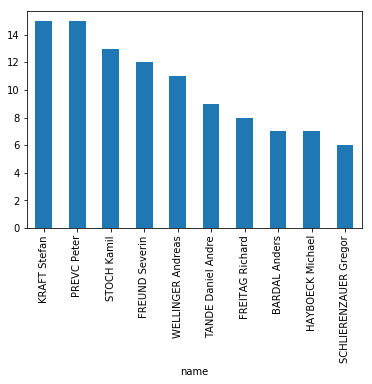

In [104]:
skoki[skoki['uvrstitev'] == 2].groupby('name').size().sort_values(ascending=False).head(10).plot.bar()

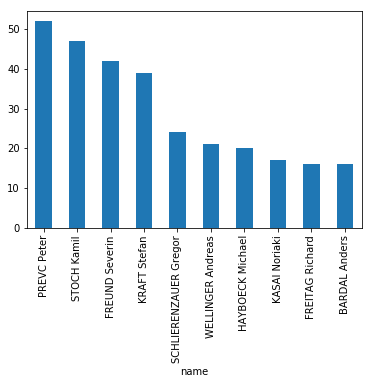

In [105]:
tekmovalec_stopnicke = skoki[skoki['uvrstitev'] <= 3].groupby('name').size().sort_values(ascending=False)
tekmovalec_stopnicke.head(10).plot.bar()

In [12]:
tekmovalec_prvi = skoki[skoki['uvrstitev'] == 1].groupby('name').size().sort_values(ascending=False)
tekmovalec_prvi.head(10)

name
STOCH Kamil              27
PREVC Peter              22
FREUND Severin           19
SCHLIERENZAUER Gregor    12
KRAFT Stefan             11
FREITAG Richard           6
HAYBOECK Michael          5
KOUDELKA Roman            4
PREVC Domen               4
JACOBSEN Anders           4
dtype: int64

In [13]:
tekmovalec_drugi = skoki[skoki['uvrstitev'] == 2].groupby('name').size().sort_values(ascending=False)
tekmovalec_drugi.head(10)

name
KRAFT Stefan             15
PREVC Peter              15
STOCH Kamil              13
FREUND Severin           12
WELLINGER Andreas        11
TANDE Daniel Andre        9
FREITAG Richard           8
BARDAL Anders             7
HAYBOECK Michael          7
SCHLIERENZAUER Gregor     6
dtype: int64

In [81]:
drzava_druga = skoki[skoki['uvrstitev'] == 2].groupby('state').size().sort_values(ascending=False)
drzava_druga

state
NOR    37
GER    35
AUT    32
SLO    23
POL    15
JPN     7
SUI     4
RUS     1
CZE     1
dtype: int64

In [17]:
sodniki_1 = ['SLO_1', 'GER_1', 'AUT_1', 'POL_1', 'JPN_1', 'NOR_1', 'FIN_1', 'CAN_1', 'KAZ_1', 'ITA_1', 'FRA_1', 'RUS_1', 'CZE_1', 'SUI_1', 'ROU_1', 'USA_1', 'KOR_1', 'SWE_1']
sodniki_2 = ['SLO_2', 'GER_2', 'AUT_2', 'POL_2', 'JPN_2', 'NOR_2', 'FIN_2', 'CAN_2', 'KAZ_2', 'ITA_2', 'FRA_2', 'RUS_2', 'CZE_2', 'SUI_2', 'ROU_2', 'USA_2', 'KOR_2', 'SWE_2']

skoki[skoki['state'] == 'SLO'][sodniki_2].mean().sort_values(ascending= False)

CZE_2    18.034314
ITA_2    17.985714
KAZ_2    17.964286
SLO_2    17.936330
POL_2    17.893258
ROU_2    17.866667
SUI_2    17.863372
RUS_2    17.817518
AUT_2    17.815217
CAN_2    17.802083
JPN_2    17.790909
FRA_2    17.775641
GER_2    17.750564
FIN_2    17.694268
SWE_2    17.660256
NOR_2    17.648968
USA_2    17.589552
KOR_2    17.500000
dtype: float64

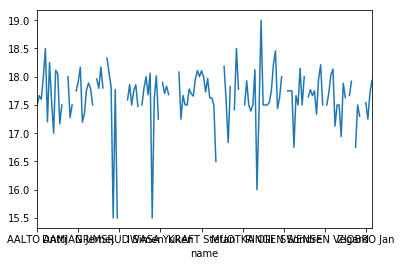

In [6]:
skoki.groupby('name').size().sort_values(ascending=False);
skoki.groupby('name').mean()['SLO_1'].plot()

In [40]:
skoki.groupby('state').size().sort_values(ascending=False);

In [99]:
#control cell
control_2012 = pd.read_csv('../data/2012.csv', sep=',', encoding='latin1')
control_2013 = pd.read_csv('../data/2013.csv', sep=',', encoding='latin1')
control_2014 = pd.read_csv('../data/2014.csv', sep=',', encoding='latin1')
control_2015 = pd.read_csv('../data/2015.csv', sep=',', encoding='latin1')
control_2016 = pd.read_csv('../data/2016.csv', sep=',', encoding='latin1')
control_2017 = pd.read_csv('../data/2017.csv', sep=',', encoding='latin1')

#control_2012.head()

In [102]:
control_2017['mesto_1'].max()
#skoki[3400:3430]
#control_2016[control_2016['mesto_1']==112.3]
#control_2016[90:110]

30.0